# CIFAR-10 Multiple Classes

In this project, We will use the famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 353s 2us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

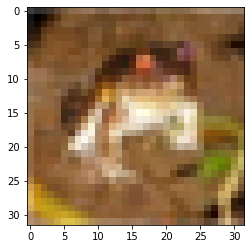

In [6]:
plt.imshow(x_train[0])

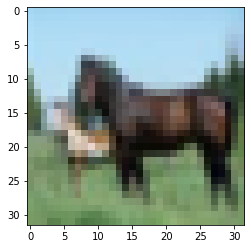

In [7]:
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [28]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 46s 914us/sample - loss: 1.5252 - accuracy: 0.4525 - val_loss: 1.3982 - val_accuracy: 0.4945
Epoch 2/15
50000/50000 [==============================] - 42s 847us/sample - loss: 1.1761 - accuracy: 0.5878 - val_loss: 1.2499 - val_accuracy: 0.5566
Epoch 3/15
50000/50000 [==============================] - 41s 830us/sample - loss: 1.0257 - accuracy: 0.6437 - val_loss: 1.3027 - val_accuracy: 0.5537
Epoch 4/15
50000/50000 [==============================] - 43s 860us/sample - loss: 0.9202 - accuracy: 0.6809 - val_loss: 1.0310 - val_accuracy: 0.6484
Epoch 5/15
50000/50000 [==============================] - 44s 874us/sample - loss: 0.8413 - accuracy: 0.7097 - val_loss: 0.9400 - val_accuracy: 0.6822
Epoch 6/15
50000/50000 [==============================] - 44s 873us/sample - loss: 0.7769 - accuracy: 0.7333 - val_loss: 1.0014 - val_accuracy: 0.6671
Epoch 7/15
50000/50000 [====================

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.525167,0.45254,1.398224,0.4945
1,1.176119,0.58778,1.249909,0.5566
2,1.025712,0.64372,1.302748,0.5537
3,0.920152,0.68094,1.031024,0.6484
4,0.841261,0.70966,0.940002,0.6822


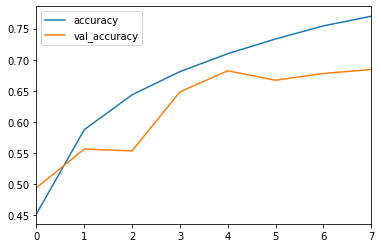

In [32]:
losses[['accuracy','val_accuracy']].plot()

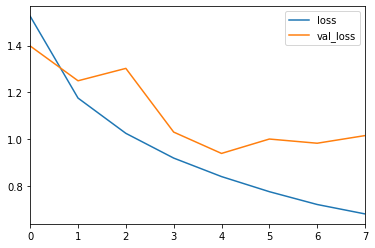

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0160868270874024, 0.6843]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.82      0.81      0.81      1000
           2       0.59      0.56      0.57      1000
           3       0.45      0.58      0.51      1000
           4       0.54      0.76      0.63      1000
           5       0.63      0.52      0.57      1000
           6       0.86      0.66      0.74      1000
           7       0.79      0.72      0.75      1000
           8       0.79      0.78      0.79      1000
           9       0.85      0.71      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[743,  21,  46,  33,  43,  12,   7,   9,  69,  17],
       [ 38, 810,  23,  17,  14,   9,   6,   4,  37,  42],
       [ 64,   5, 563, 109, 144,  49,  30,  18,  11,   7],
       [ 11,  11,  74, 582, 113, 126,  23,  32,  16,  12],
       [ 13,   0,  56,  83, 760,  24,  12,  43,   8,   1],
       [ 10,   4,  66, 242,  79, 521,  15,  49,   8,   6],
       [  9,   6,  57, 107, 113,  30, 658,  11,   5,   4],
       [ 16,   0,  33,  63, 108,  44,   3, 716,   3,  14],
       [ 78,  38,  19,  20,  25,   6,   4,   6, 782,  22],
       [ 41,  93,  24,  31,  18,   5,   9,  20,  51, 708]], dtype=int64)

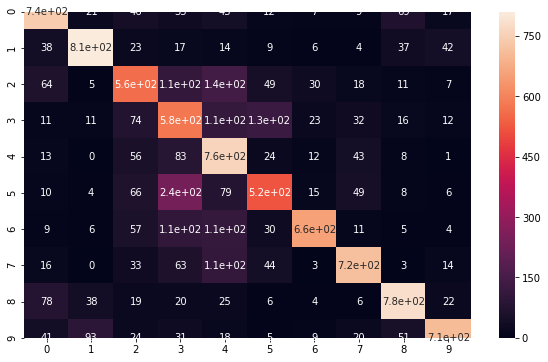

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [40]:
my_image = x_test[16]

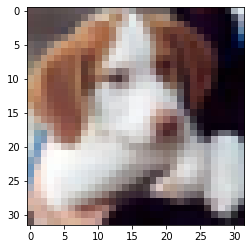

In [41]:
plt.imshow(my_image)

In [42]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)